## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Problem Statement</span>

#### <span style=" font-family:'abadi';font-style:italic;">A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.</span>


#### <span style=" font-family:'abadi';font-style:italic;">In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.</span>


#### <span style=" font-family:'abadi';font-style:italic;">They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:</span>

#### <span style=" font-family:'abadi';font-style:italic;">Which variables are significant in predicting the demand for shared bikes.</span>
#### <span style=" font-family:'abadi';font-style:italic;">How well those variables describe the bike demands</span>


### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Business Goal</span>

#### <span style=" font-family:'abadi';font-style:italic;">You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.</span>

In [1]:
#Importing the necessary libraries used
#Panda for Data Wrangling and Data manipulation purposes
#NumPy objects to create arrays/metrics to apply DL/ML models
#Matplotlib to create a range of plots and visualization
#Seaborn to create visually appealing statistical graphics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#import warnings to suppress warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
boombikes = pd.read_csv('day.csv')

In [4]:
#Setting display option
pd.set_option("display.max_columns",300)
pd.set_option('display.max_rows',300)

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';"> Reading and Understanding the Data</span>

In [5]:
#Checking the shape of the dataframe
boombikes.shape

(730, 16)

In [6]:
#Viewing the dataframe
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#Understanding the information about boombikes
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <span style="font-weight : bold; font-family:'abadi';font-style:italic;">We can also observe that we dont have any null values in the dataset</span>

In [8]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Identifying the Data Quality Issues and rectifying them</span>

### <span style="font-weight : bold; font-family:'abadi';">1. Check for duplicates</span>

In [9]:
boombikes[boombikes.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">There are no duplicate records</span>

### <span style="font-weight : bold; font-family:'Times New Roman';">2. Removing few columns which do not add any value to our predictions</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">instant - As this column is index column, doesnt add any value for analysis</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">dteday - As this column is redundant, we have the same information in yr, mnth, weekday</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">casual - As cnt = casual + registered. This would again be a redundant column</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">registered - As cnt = casual + registered. This would again be a redundant column</span>

In [10]:
boombikes.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [11]:
boombikes.shape

(730, 12)

### <span style="font-weight : bold; font-family:'Times New Roman';">3. Renaming few columns for better understanding</span>

In [12]:
boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

### <span style="font-weight : bold; font-family:'Times New Roman';">4. Encoding/Mapping Variables</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Few columns which are categorical in data have numerical values. Lets change the data to category as per the data dictionary. This also provides better understadning of data</span>

In [13]:
boombikes[['season']] = boombikes[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))

<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Mapped Season column as per data dictionary</span>

In [14]:
boombikes[['month']] = boombikes[['month']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                                                       5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                       9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Mapped month column as per data dictionary</span>

In [15]:
boombikes[['weekday']] = boombikes[['weekday']].apply(lambda x: x.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 
                                                                   4: 'Thu', 5: 'Fri', 6: 'Sat'}))

<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Mapped weekday column as per data dictionary. Here we have assumed that 0-Sun and 6-Sat </span>

In [16]:
boombikes[['weathersit']] = boombikes[['weathersit']].apply(lambda x: x.map({1:'Good', 2:'Moderate', 3:'Bad', 4:'Very Bad'}))

<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Mapped weathersit column as per data dictionary. </span>
    <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here we have assumed as below :</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">1: Clear, Few clouds, Partly cloudy, Partly cloudy - Good</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - Moderate</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - Bad</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - Very Bad</span></br>

In [17]:
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Lets convert the category columns to category type - to enable the benefits of category type : less memory, etc</span>

In [19]:
#Lets identify the categorical and numerical variables and then convert the datatypes

#Categorical variables

categorical_vars = ['season','year','month','holiday','weekday', 'workingday','weathersit']


# identify numeric variables

numerical_vars = ['temp','atemp','humidity','windspeed','count']

In [20]:
#converting dtype of categorical variables

boombikes[categorical_vars] = boombikes[categorical_vars].astype('category')

In [21]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


### <span style="font-weight : bold; font-family:'Times New Roman';">5. Outlier Detection</span>

In [22]:
#To check the unique values, to see possibility of outliers
boombikes.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

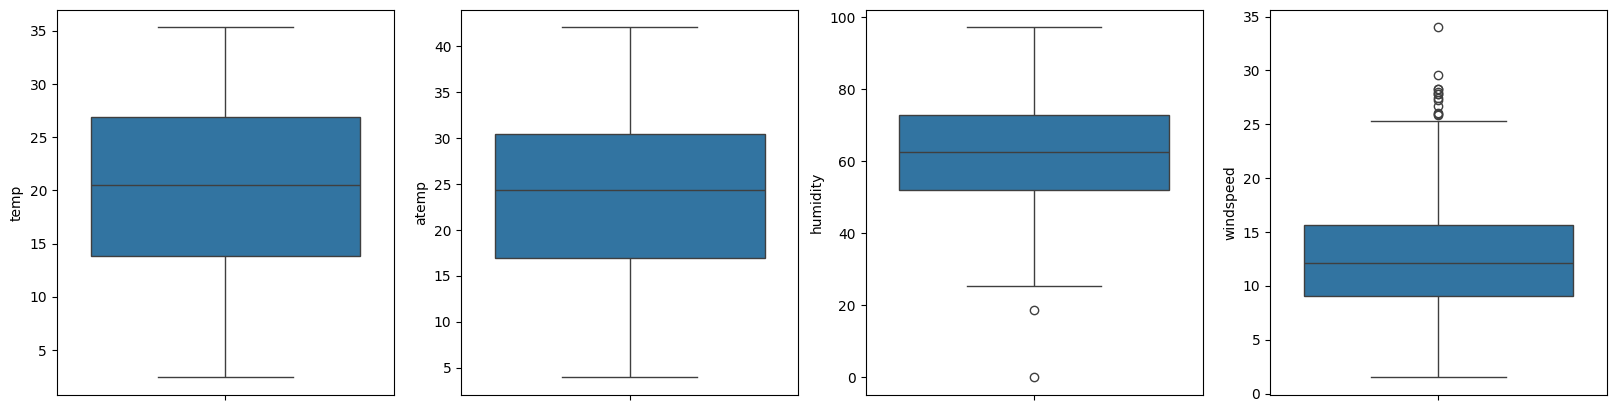

In [23]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(20,5))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=boombikes)
    i+=1

<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can find few outliers in cols - humidity and windspeed.</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Lets check the significance of these outliers</span>

In [24]:
#find outlier of percentage for humidity and windspeed

def percentage_outlier(x):    
    iqr = boombikes[x].quantile(0.75)-boombikes[x].quantile(0.25) 
    HR = boombikes[x].quantile(0.75)+iqr*1.5
    LR = boombikes[x].quantile(0.25)-iqr*1.5 
    perc_outlier = ((boombikes[x]<LR).sum()+(boombikes[x]>HR).sum())/len(boombikes[x])*100
    perc_outlier = round(perc_outlier,2)
    return(perc_outlier)
print('Percentage of outlier for humidity: ', percentage_outlier('humidity'))
print('Percentage of outlier for windspeed: ', percentage_outlier('windspeed'))

Percentage of outlier for humidity:  0.27
Percentage of outlier for windspeed:  1.78


<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">As the percentage of outliers is less, no action to be taken</span></br>

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Exploratory Data Analysis (EDA)</span>

<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Our target variable is - 'count'. Lets visulaize the trend of target variable over the 2 years</span>

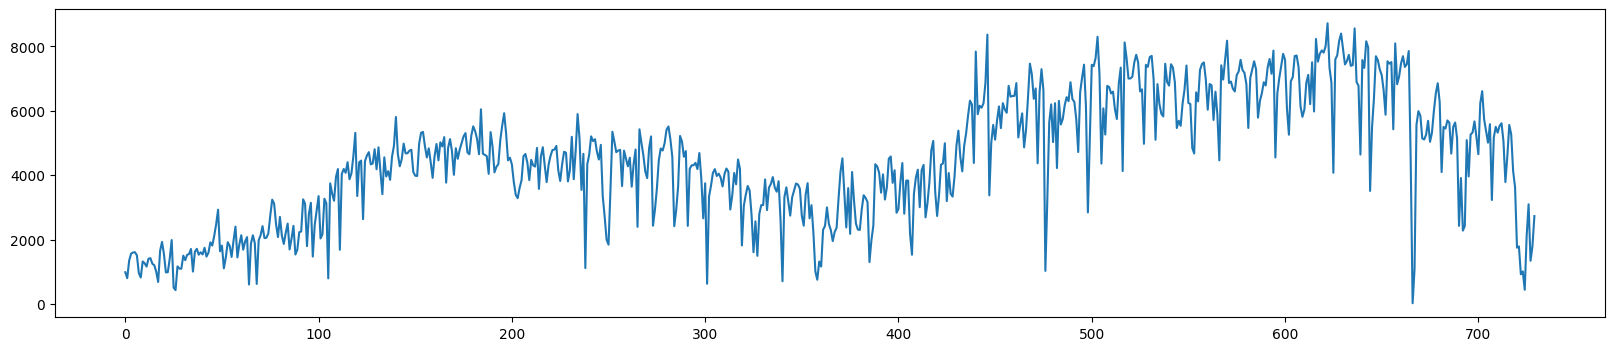

In [25]:
plt.figure(figsize=(20,4))
plt.plot(boombikes['count'])
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can observe that initially the demand increased, later became stagnant and in the end, it started decreasing</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Univariate Analysis</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Visualizing all the categorical variables using pie charts</span>

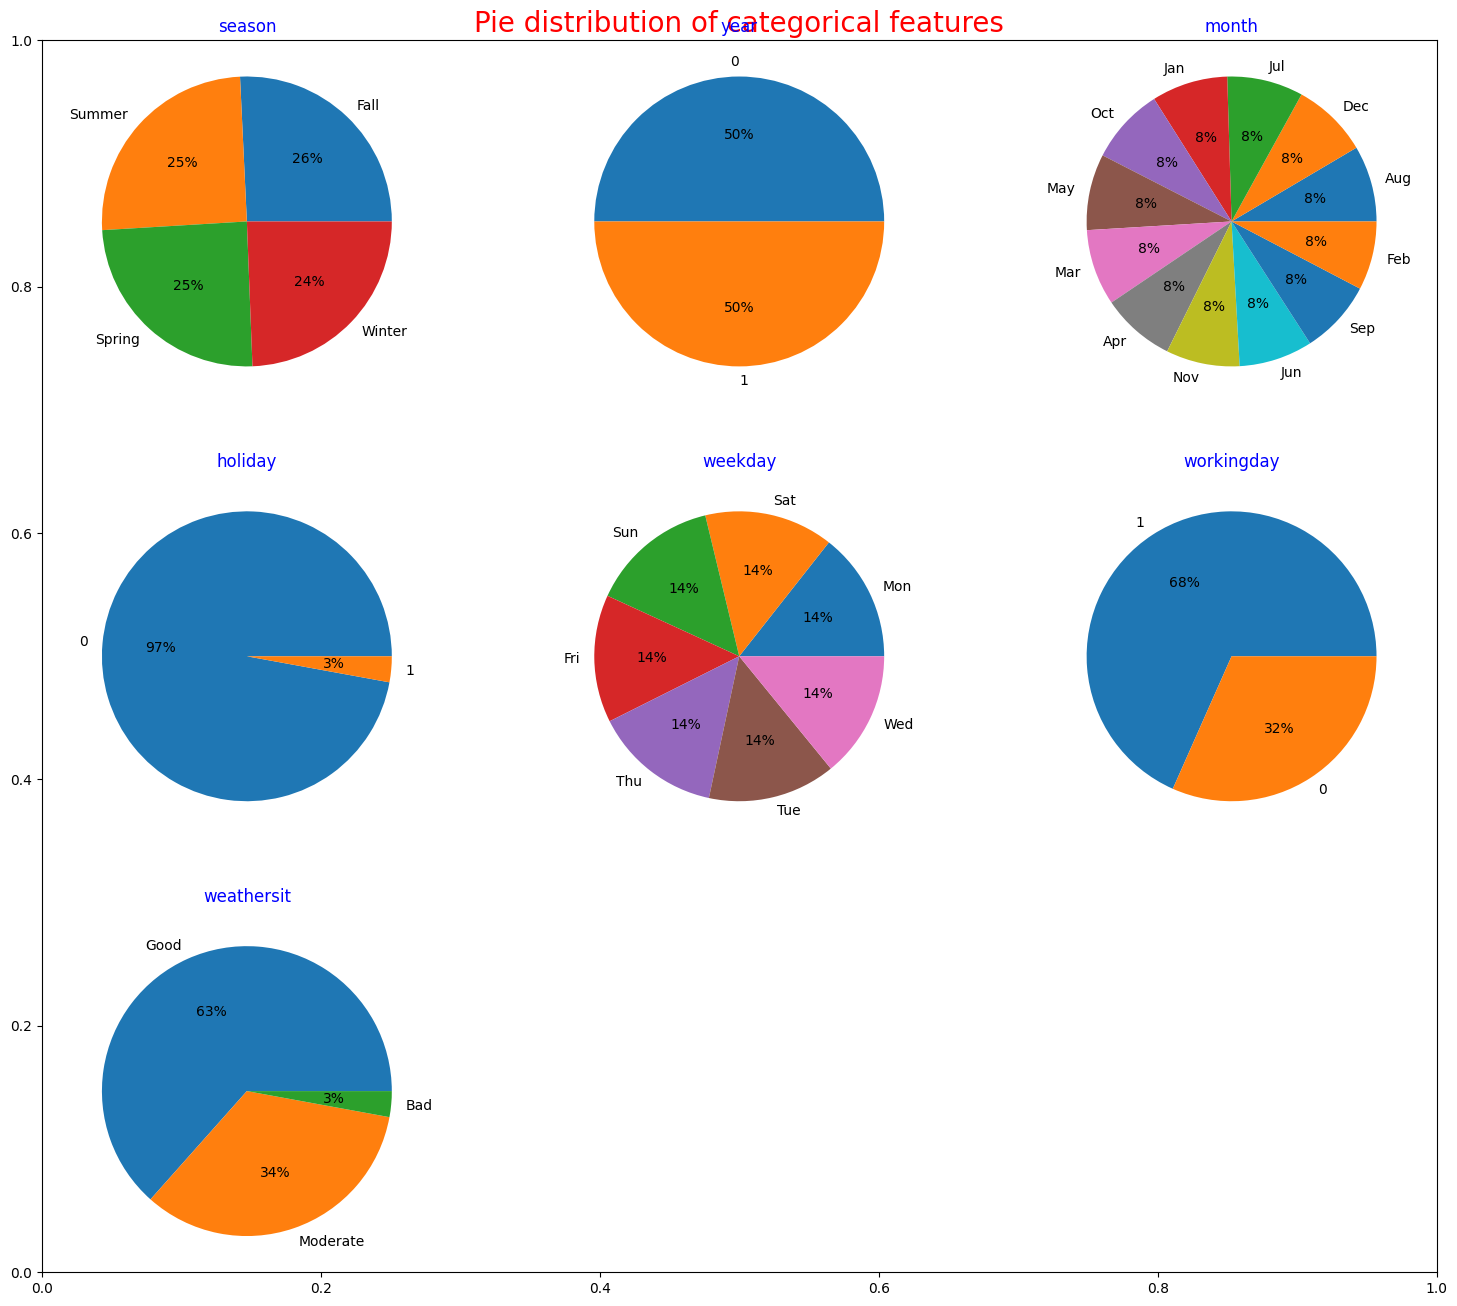

In [26]:
boombikes_cat=boombikes.select_dtypes(include='category')
plt.figure(figsize=(18,16))
plt.title('Pie distribution of categorical features',fontsize=20,color='red')

for i in range(1,boombikes_cat.shape[1]+1): 
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(boombikes_cat.columns.values[i-1],color='blue')
    values=boombikes_cat.iloc[:,i-1].value_counts(normalize=True).values
    index=boombikes_cat.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can visualize the distribution of the data through all the seasons, holidays, weather etc,.</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can see that the season, year, month and weekday are all almost equally distributed - as expected through 2 years of data recorded</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can observe that only 3% of the days had holidays</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can observe that we had 68% of working days through 2 years</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can observe that majority of the time(63%) - the weather was good, 34% of the time - it was moderate, 3% - Bad. We haven't faced Very Bad weather in these 2 years</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Visualizing all the numerical variables using histogram plots</span>

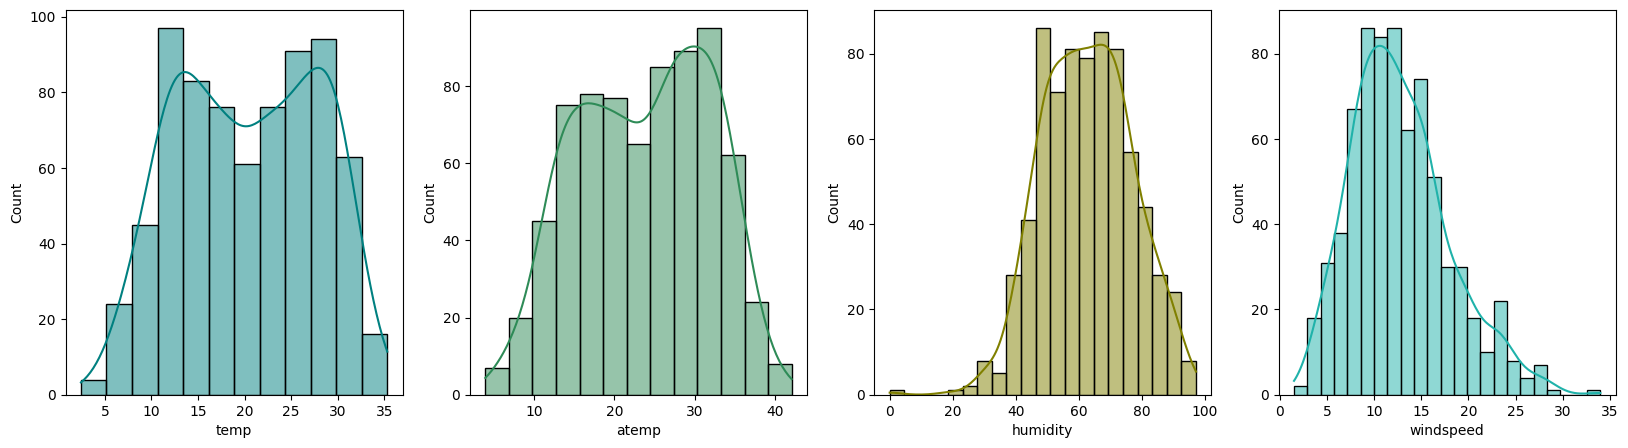

In [27]:
#Analyzing the numerical vars
boombikes_num = {
    'temp': { 'color': 'teal' },
    'atemp': { 'color': 'seagreen' },
    'humidity': { 'color': 'olive' },
    'windspeed': { 'color': 'lightseagreen' }
}
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

for i, (num, config) in enumerate(boombikes_num.items()):
    sns.histplot(data = boombikes, x = num, ax = ax[i], color = config['color'], kde = True)

plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can visualize the distribution of the numerical variables</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can see that the temp is almost normally distributed with 2 peaks. We can observe that the temp is usually between 12.5-27.5 most of the times. Extreme temperature is very rare</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can see that the atemp is almost normally distributed with 2 peaks. We can observe that the temp is usually between 15-35 most of the times. Extreme temperature is very rare</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can observe that humidity is also normally distributed but right skewed. It ranges between 45-75 most of the times.</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can observe that windspeed is also normally distributed but left skewed. It ranges between 7.5-17.5 most of the times.</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Bivariate Analysis</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Visualizing independent categorical variables against our target (dependent) variable</span>

In [28]:
#function for bar plot and box plot for categorical vars to analyse the bookings
def boombikes_cat(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.boxplot(x =column, y = 'count', data = boombikes)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='count',hue='year',data = boombikes,palette='Accent')
    plt.legend(title='Year')
    plt.show()

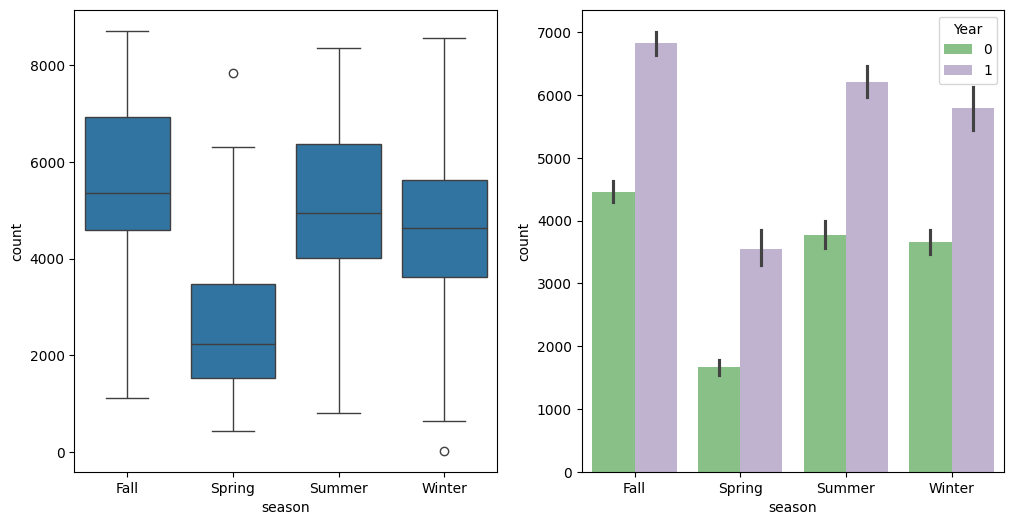

In [29]:
#Analyzing trend in bookings against seasons
boombikes_cat('season')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that the highest bookings are happening in the fall season, least in spring season. The bookings have increased in 2019 compared to 2018</span>

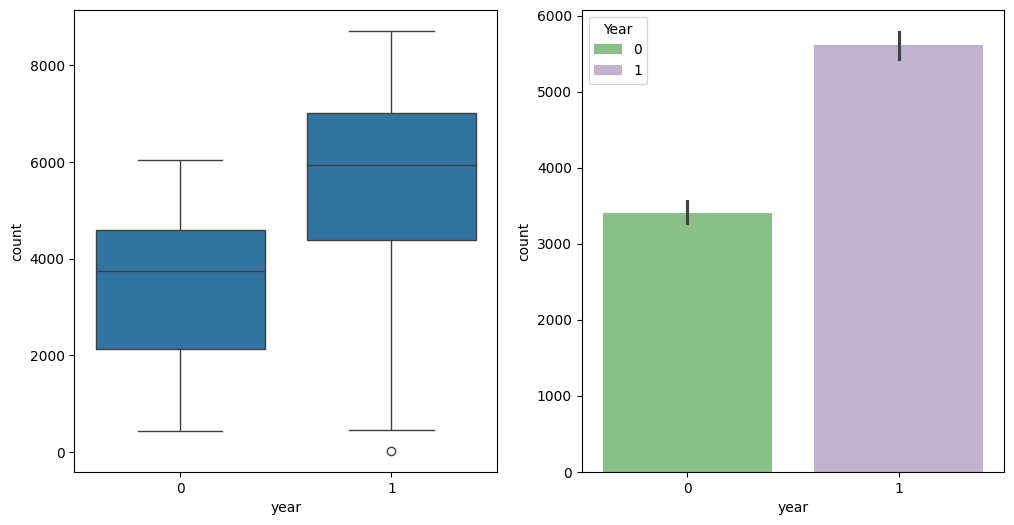

In [30]:
#Analyzing trend in bookings against years
boombikes_cat('year')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that the bookings have increased in 2019 compared to 2018</span>

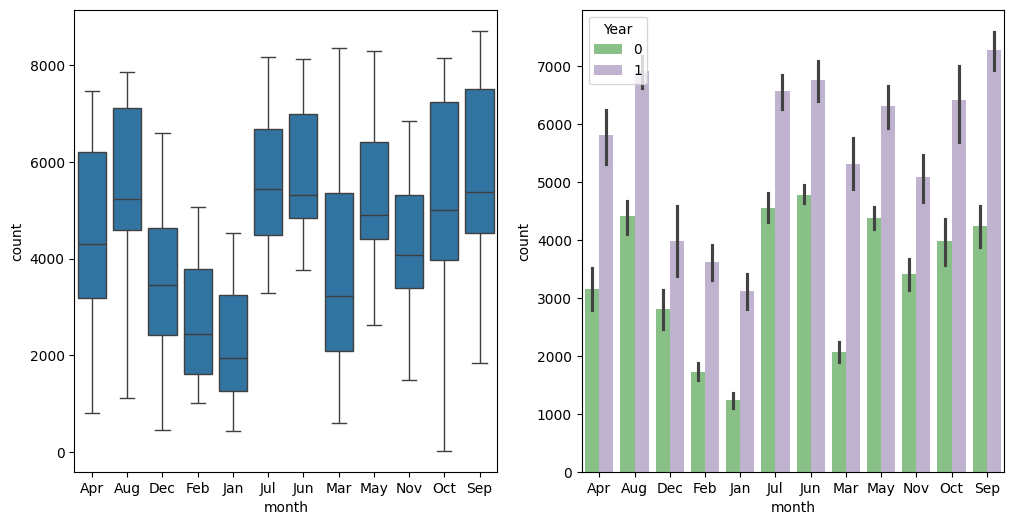

In [31]:
#Analyzing trend in bookings against month
boombikes_cat('month')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that the highest bookings are happening in the September month, least in January. The bookings have increased in 2019 compared to 2018</span>

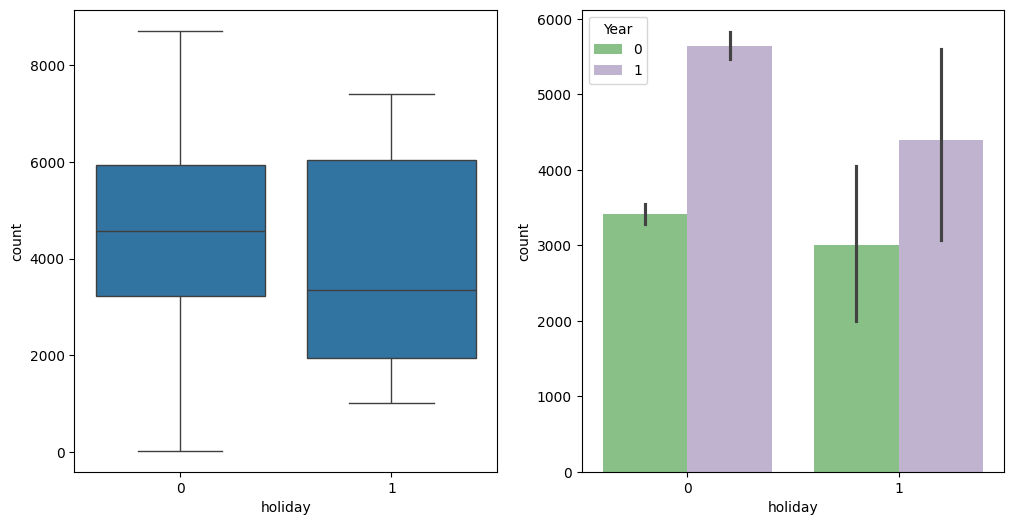

In [32]:
#Analyzing trend in bookings against holiday
boombikes_cat('holiday')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that the highest bookings are happening during weekdays and less on holidays. The bookings have increased in 2019 compared to 2018</span>

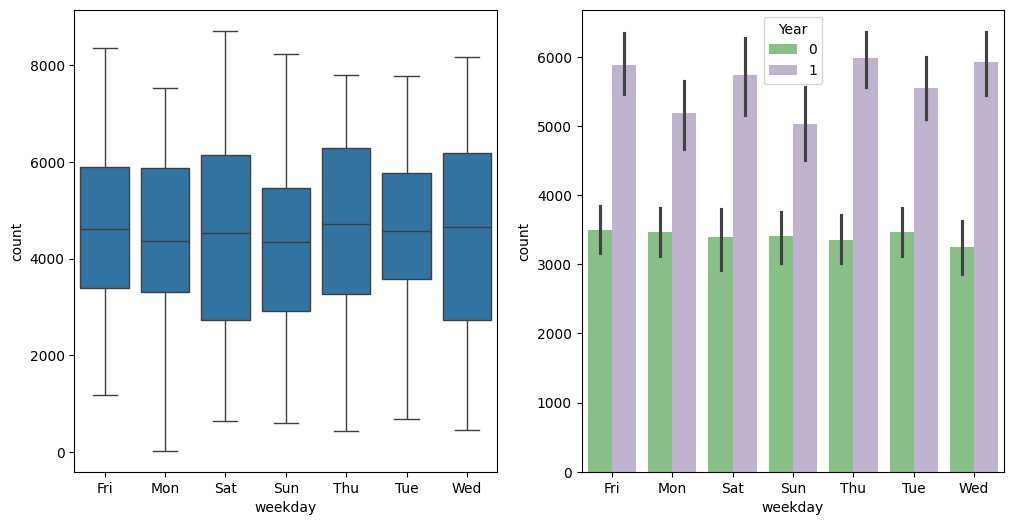

In [33]:
#Analyzing trend in bookings against weekday
boombikes_cat('weekday')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">There is not much difference in bookings based on the day of the week. The bookings have increased in 2019 compared to 2018, which looks like a natural trend as per data of count we saw.</span>

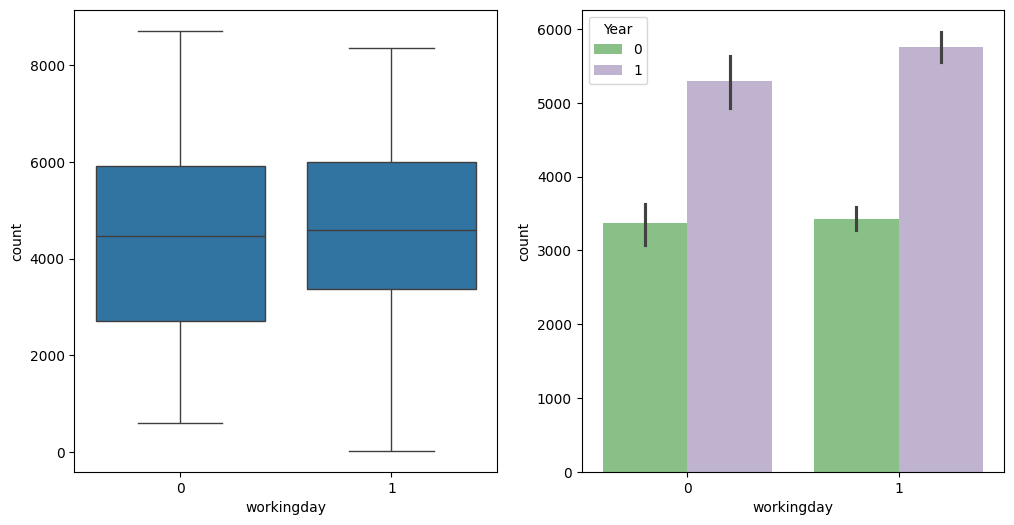

In [34]:
#Analyzing trend in bookings against workingday
boombikes_cat('workingday')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that the highest bookings are happening on working days and less on non-working days. The bookings have increased in 2019 compared to 2018</span>

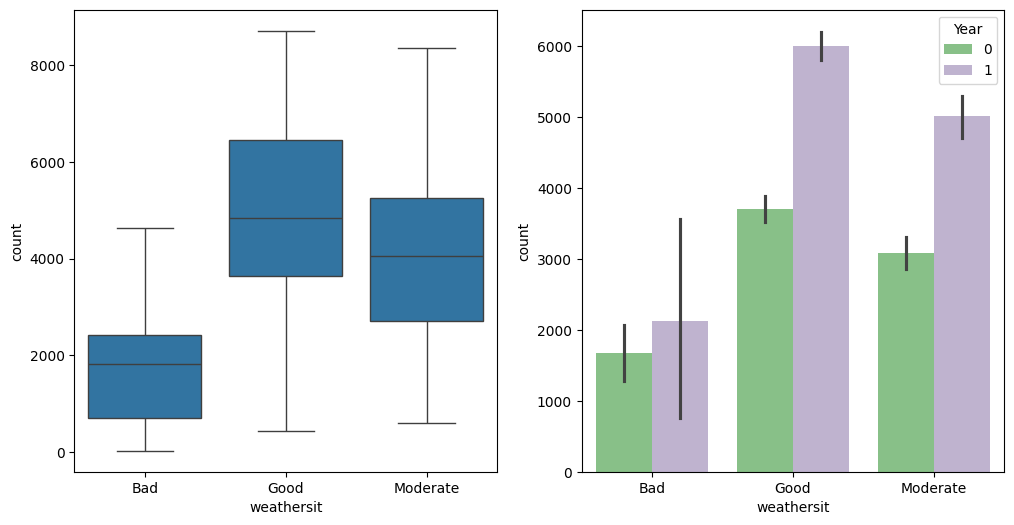

In [35]:
#Analyzing trend in bookings against weathersit
boombikes_cat('weathersit')

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that the highest bookings are happening in good weather or moderate weather days and less on bad weather days. The bookings have increased in 2019 compared to 2018</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Visualizing independent numerical/continuos variables against our target (dependent) variable</span>

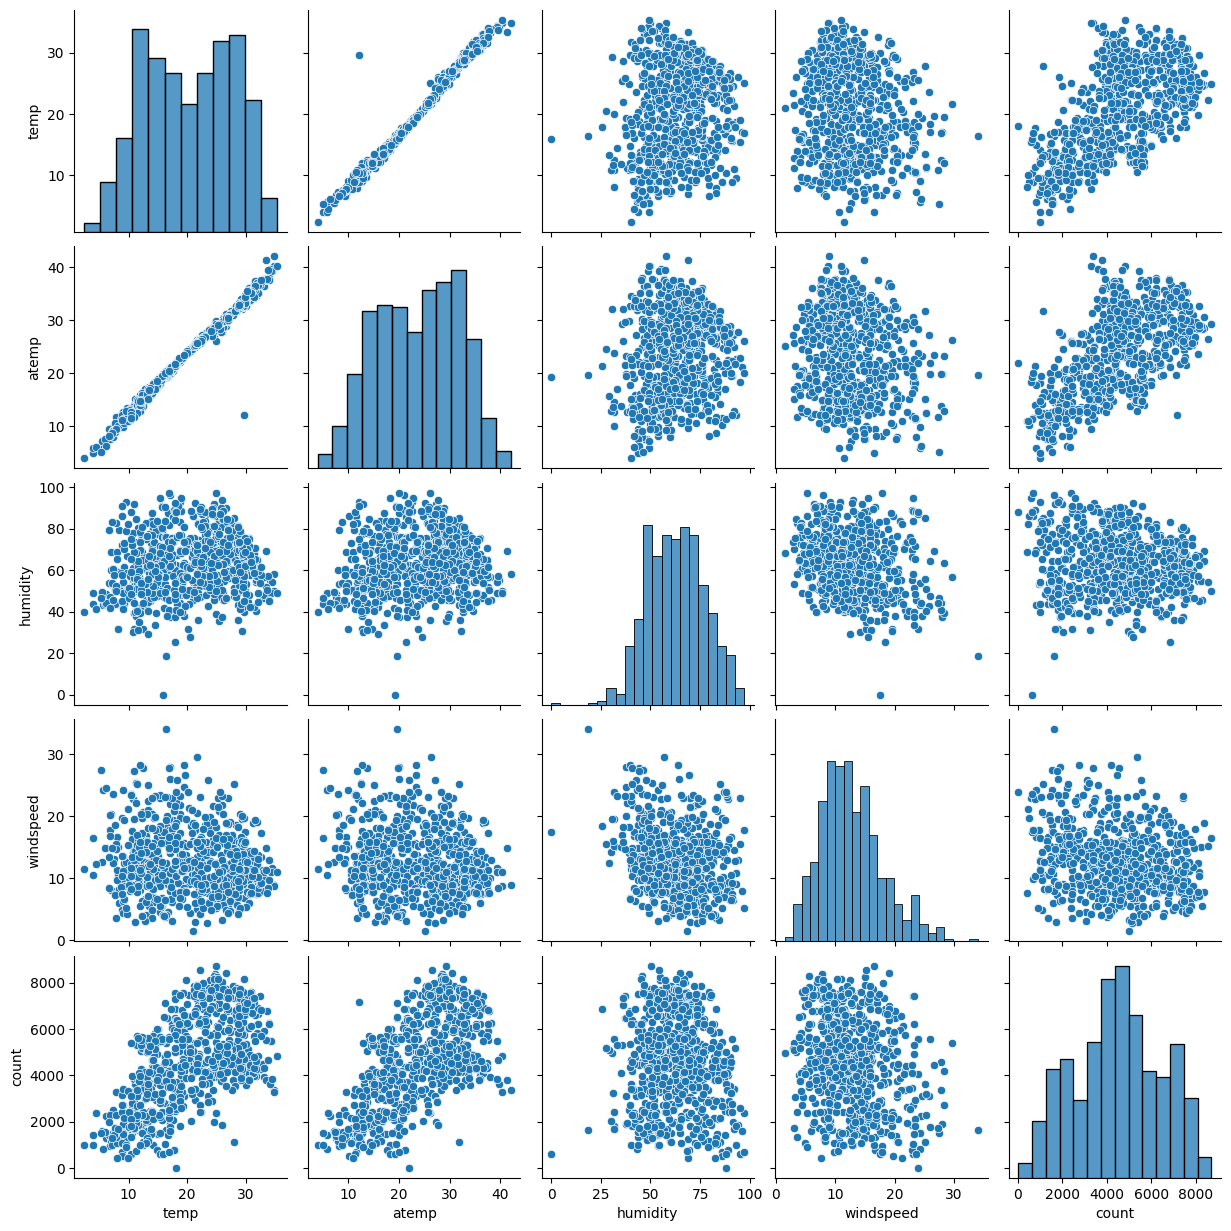

In [36]:
#Analysing the numerical columns

sns.pairplot(data=boombikes,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can conclude from pair plot that :</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">A linear mode can be considered for this situation as we have few independent variables showing linear relationship with target varaible.</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Temp and atemp are showing positive linear correlation with target varaible</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We also see, temp and atemp have very similar impact on target variable count as they both are highly correlated. We might drop one while building the model to avoid multicollinearity</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Lets also plot a heatmap with correlations of the numerical vars, to understand better on the relations</span>

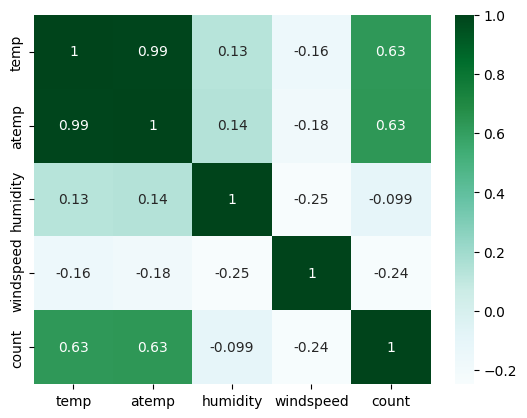

In [37]:
sns.heatmap(boombikes[['temp','atemp','humidity','windspeed','count']].corr(), cmap='BuGn', annot = True)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can conclude from heatmap that :</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Temp and atemp are showing positive linear correlation with target varaible</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Humidity and windspeed have negative correlation with target variable count.</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">0.99 high correlation between temp and atemp</span>

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Data Preparation for building model</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Creating Dummy Variables</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We have 4 categorical variables with more than 2 categories. So, lets crate dummy variables for these.</span>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Categories - season, month, weekday and weathersit</span>

In [38]:
month_dv=pd.get_dummies(boombikes.month,drop_first=True)
weekday_dv=pd.get_dummies(boombikes.weekday,drop_first=True)
weathersit_dv=pd.get_dummies(boombikes.weathersit,drop_first=True)
season_dv=pd.get_dummies(boombikes.season,drop_first=True)

In [39]:
#inspecting head of boombikes dataset before merging with dummy variables
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
# Merging the boombikes dataframe with the dummy variable dataframes
boombikes = pd.concat([boombikes,month_dv,weekday_dv,weathersit_dv,season_dv],axis=1)

In [41]:
#inspecting head of boombikes dataset after merging with dummy variables
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Good,Moderate,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False


In [42]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
 12  Aug         730 non-null    bool    
 13  Dec         730 non-null    bool    
 14  Feb         730 non-null    bool    
 15  Jan         730 non-null    bool    
 16  Jul         730 non-null    bool    
 17  Jun         730 non-null    bool    
 18  Mar         730 non-null    bool    
 19  May     

In [43]:
#dropping few columns which are unnecessary as we already have created dummy variables to represnt these
boombikes.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [44]:
boombikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Good,Moderate,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False


In [45]:
boombikes.shape

(730, 30)

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Plot heatmap for correlation of all the variables</span>

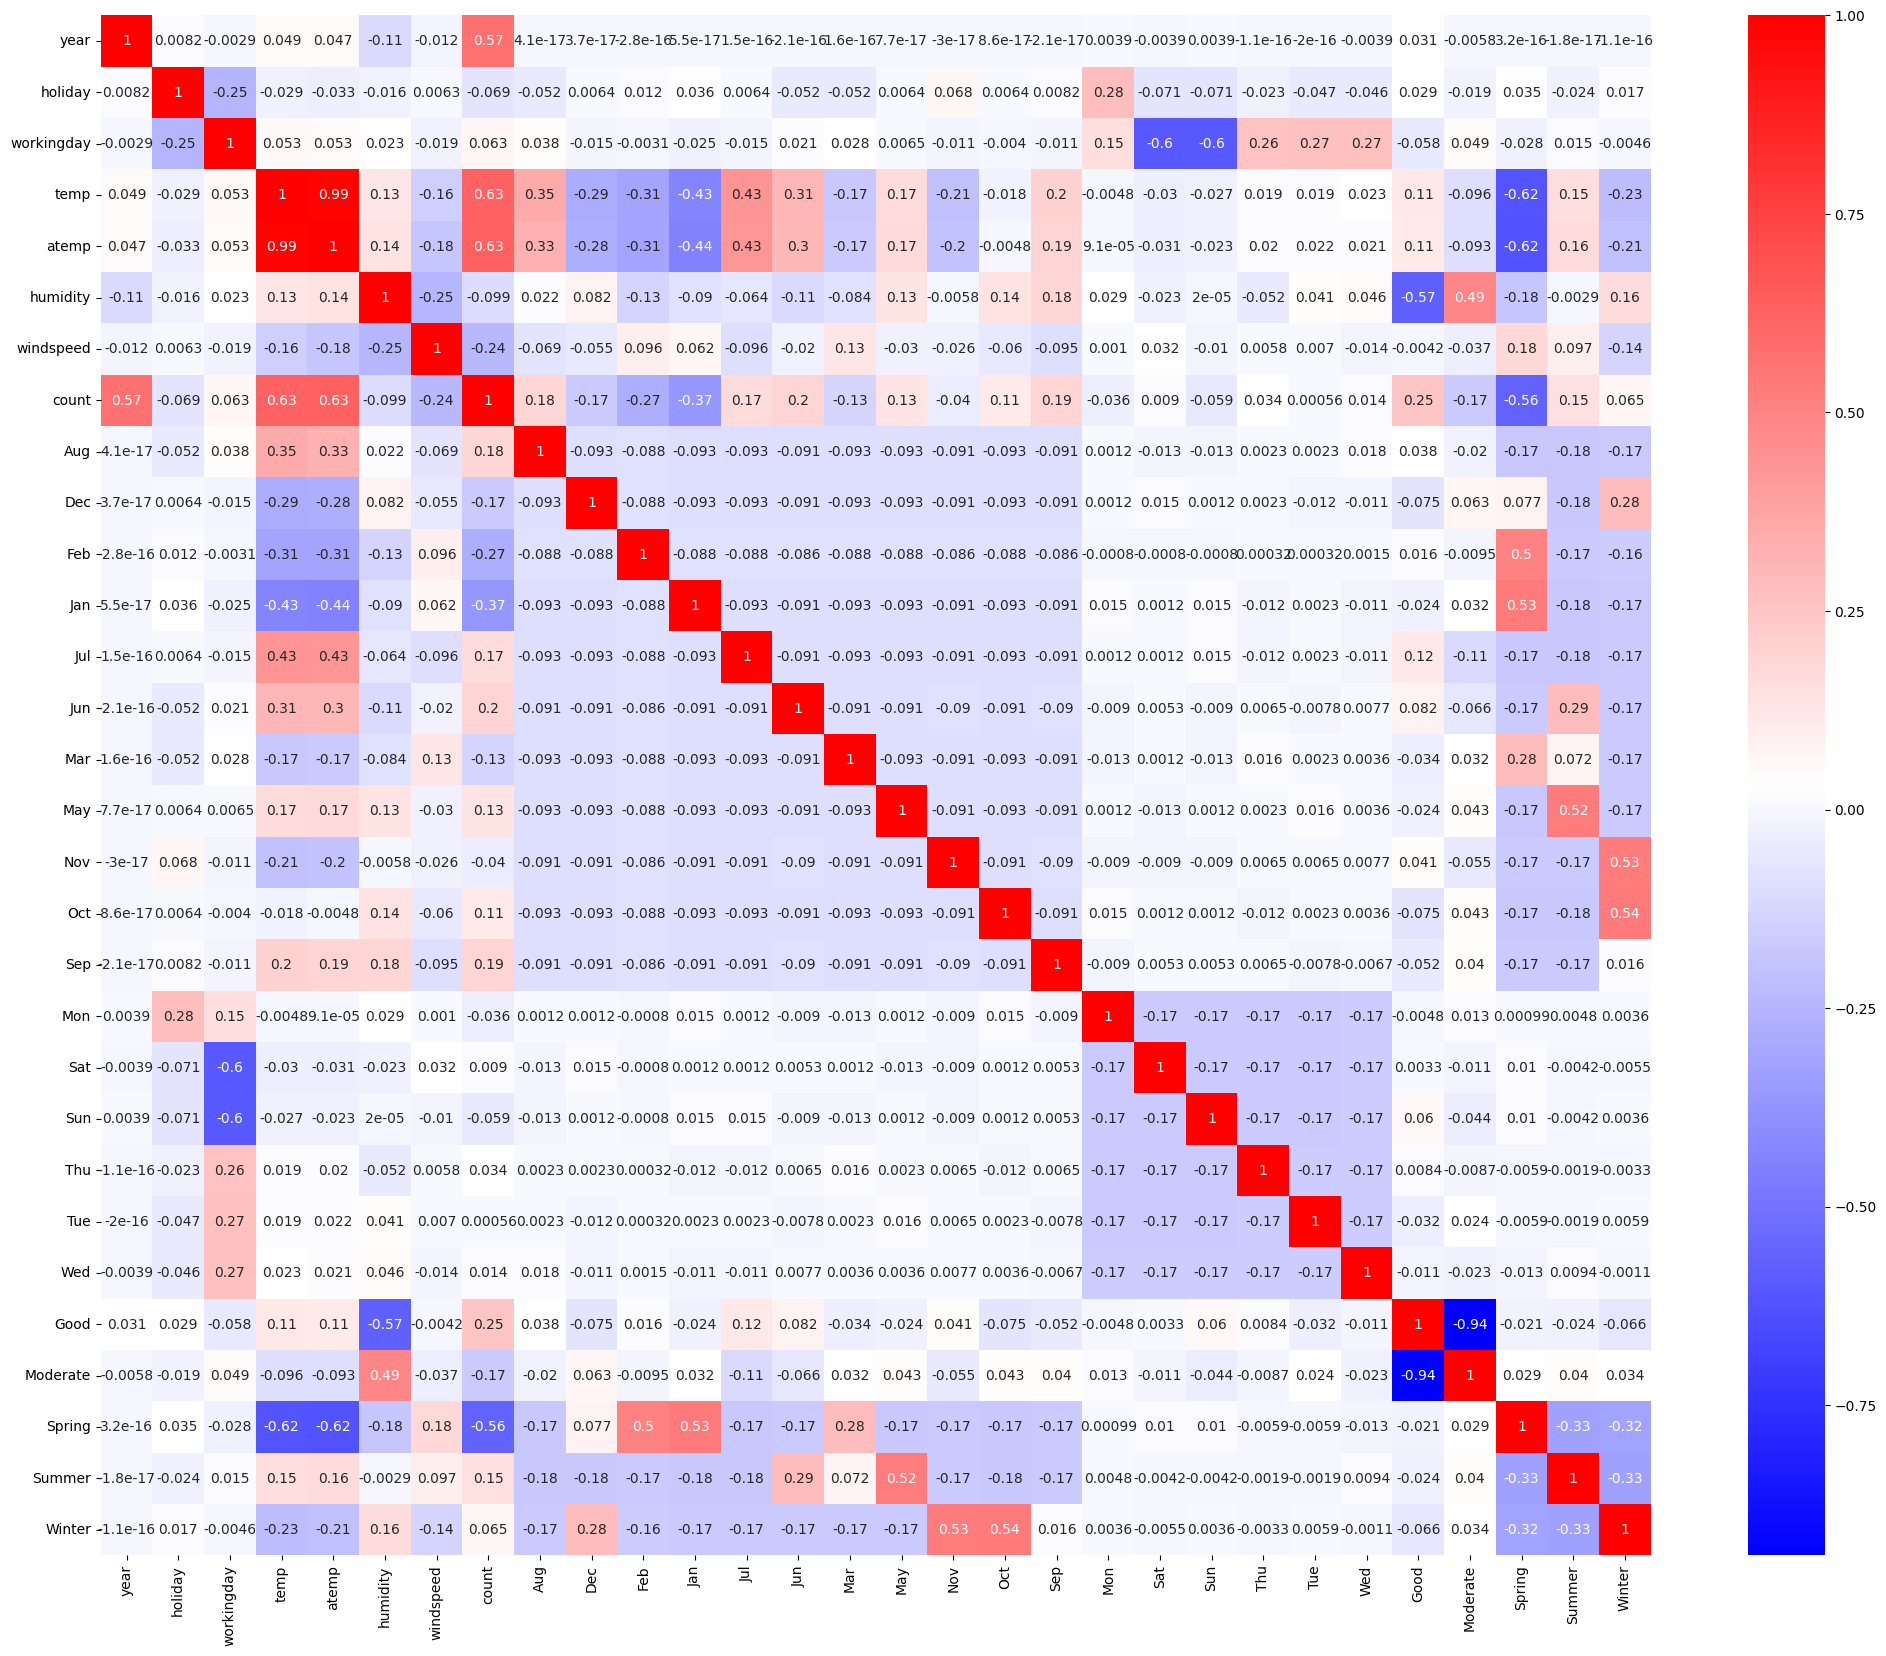

In [46]:
#Plotting a heatmap for all the variables including dummy varaibles
plt.figure(figsize = (25,20))
sns.heatmap(boombikes.corr(), annot = True, cmap="bwr")
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can conclude from heatmap that :</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">It provides a clear understadning of collinearity between variables</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">High collinearity between variables is not appreciated as it cause multicollinearity in the model. Hence considering that from heatmap and VIF values and P-values we will create a best fit model</span>

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Data Splitting into Train and Test Data sets</span>

In [47]:
#Review dataset shape before split
boombikes.shape

(730, 30)

In [48]:
#Review dataset info before split
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        730 non-null    category
 1   holiday     730 non-null    category
 2   workingday  730 non-null    category
 3   temp        730 non-null    float64 
 4   atemp       730 non-null    float64 
 5   humidity    730 non-null    float64 
 6   windspeed   730 non-null    float64 
 7   count       730 non-null    int64   
 8   Aug         730 non-null    bool    
 9   Dec         730 non-null    bool    
 10  Feb         730 non-null    bool    
 11  Jan         730 non-null    bool    
 12  Jul         730 non-null    bool    
 13  Jun         730 non-null    bool    
 14  Mar         730 non-null    bool    
 15  May         730 non-null    bool    
 16  Nov         730 non-null    bool    
 17  Oct         730 non-null    bool    
 18  Sep         730 non-null    bool    
 19  Mon     

In [49]:
#y-contains only target variable
y=boombikes.pop('count')

#X-contains all independent or predicting varaibles
X=boombikes

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [50]:
#Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


In [65]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Good',
       'Moderate', 'Spring', 'Summer', 'Winter'],
      dtype='object')

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Feature Scaling</span>

* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">When all the continuous variables are in same scale, the model built will give better interpretations of coefficients</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Scaling all the continous variables in our dataset to same scale</span>

In [1]:
#Dataframe of numeric vars
boombikes_num = X_train[['temp', 'atemp', 'humidity', 'windspeed']]

NameError: name 'X_train' is not defined

In [55]:
# Fit the scaler on the training data
scaler = MinMaxScaler()

In [59]:
scaler.fit(X_train[['temp', 'atemp', 'humidity', 'windspeed']])

MinMaxScaler()

In [62]:
X_train_scaled = scaler.transform(X_train[['temp', 'atemp', 'humidity', 'windspeed']])

In [63]:
X_train[['temp', 'atemp', 'humidity', 'windspeed']] = X_train_scaled

In [64]:
#Analyze stats after scaling
X_train.describe()

,temp,atemp,humidity,windspeed
count,511.000000,511.000000,511.000000,511.000000
mean,0.552390,0.544999,0.644967,0.317738
std,0.230467,0.223170,0.149518,0.167252
min,0.000000,0.000000,0.000000,0.000000
25%,0.343347,0.345523,0.524903,0.197851
50%,0.551893,0.555450,0.650064,0.294759
75%,0.757231,0.731772,0.752469,0.406464
max,1.000000,1.000000,1.000000,1.000000


In [95]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Good,Moderate,Spring,Summer,Winter
707,1,0,0,0.417140,0.434610,0.933018,0.243629,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
172,0,0,1,0.865247,0.858891,0.729068,0.274549,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
14,0,0,0,0.223565,0.236172,0.513954,0.243603,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
204,0,0,0,0.989306,1.000000,0.567625,0.267859,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
182,0,0,0,0.871664,0.821838,0.458136,0.150755,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False


### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Building the Model</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">We will follow both the Automated and Manual approach for building the model</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">RFE - Automated Approach</span>

* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">As we have 29 predicting columns, we will use RFE method to bring that down to 15 columns</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We will use SKLearn to do the above</span>

In [69]:
#Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
#Selecting 15 top features for getting the best model
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [71]:
#View cols selected by RFE and its corresponding weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(9)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('Aug', np.False_, np.int64(13)),
 ('Dec', np.True_, np.int64(1)),
 ('Feb', np.False_, np.int64(4)),
 ('Jan', np.False_, np.int64(2)),
 ('Jul', np.False_, np.int64(3)),
 ('Jun', np.False_, np.int64(7)),
 ('Mar', np.False_, np.int64(15)),
 ('May', np.False_, np.int64(6)),
 ('Nov', np.True_, np.int64(1)),
 ('Oct', np.False_, np.int64(11)),
 ('Sep', np.True_, np.int64(1)),
 ('Mon', np.False_, np.int64(5)),
 ('Sat', np.False_, np.int64(8)),
 ('Sun', np.True_, np.int64(1)),
 ('Thu', np.False_, np.int64(14)),
 ('Tue', np.False_, np.int64(10)),
 ('Wed', np.False_, np.int64(12)),
 ('Good', np.True_, np.int64(1)),
 ('Moderate', np.True_, np.int64(1)),
 ('Spring', np.True_, np.int64(1)),
 ('Summer', np.True_, np.int64(1)),
 ('Winter', np.Tru

In [72]:
#View cols selected by RFE and start manual elimination for getting the best features
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [73]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Oct',
       'Mon', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [75]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']]

X_train_rfe.shape

(511, 15)

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Manual approach - feature elimination based on VIF and P-Value</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Lets create 2 user defined functions for building a model and for calculating VIF. As we will have to use it multiple times</span>

In [104]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    # Add a constant
    X_train_sm = sm.add_constant(X_train[cols].astype(float))
    
    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Check the parameters obtained
    # print(lm.params)
    print(lm.summary())
    return lm

In [81]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 1 - Includes all the columns selected by RFE</span>

In [82]:
cols = ['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.60e-193
Time:                        19:03:39   Log-Likelihood:                -4106.7
No. Observations:                 511   AIC:                             8245.
Df Residuals:                     495   BIC:                             8313.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1024.2516    402.973      2.542      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We find that atemp as very high VIF and also very high p-value. Previosuly we had also seen that it has 0.99 correlation with temp.</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Considering all these, let us create the next model by dropping atemp</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 2 - Dropping atemp</span>

In [84]:
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

In [85]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.22e-194
Time:                        19:08:51   Log-Likelihood:                -4106.8
No. Observations:                 511   AIC:                             8244.
Df Residuals:                     496   BIC:                             8307.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1012.9684    401.842      2.521      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We find that Dec as high p-value.</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Let us create the next model by dropping Dec</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 3 - Dropping Dec</span>

In [86]:
cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

In [87]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.96e-194
Time:                        19:13:14   Log-Likelihood:                -4110.1
No. Observations:                 511   AIC:                             8248.
Df Residuals:                     497   BIC:                             8308.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        871.1351    400.099      2.177      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We find that Humidity as high VIF</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Let us create the next model by dropping Humidity</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 4 - Dropping Humidity</span>

In [89]:
cols = ['year', 'holiday', 'temp', 'windspeed',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

In [90]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.99e-188
Time:                        19:14:24   Log-Likelihood:                -4128.2
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     498   BIC:                             8337.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -623.4047    324.918     -1.919      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here, we find Good has high VIF, but low p-value</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here, we find Nov has high p-value, but low VIF</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Let us build two models, 1 without Good and 1 without Nov and decide on the results </span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 5 - Dropping Good, holding Nov</span>

In [92]:
cols = ['year', 'holiday', 'temp', 'windspeed',
       'Nov', 'Sep', 'Sun', 'Moderate', 'Spring', 'Summer', 'Winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.61e-164
Time:                        19:19:58   Log-Likelihood:                -4187.5
No. Observations:                 511   AIC:                             8399.
Df Residuals:                     499   BIC:                             8450.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.1721    292.036      5.462      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 6 - Dropping Nov, Holding Good</span>

In [91]:
cols = ['year', 'holiday', 'temp', 'windspeed',
        'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.11e-188
Time:                        19:19:54   Log-Likelihood:                -4130.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     499   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -697.3109    323.604     -2.155      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 7 - Dropping Nov and Good</span>

In [105]:
cols = ['year', 'holiday', 'temp', 'windspeed',
        'Sep', 'Sun', 'Moderate', 'Spring', 'Summer', 'Winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          9.15e-165
Time:                        19:44:51   Log-Likelihood:                -4188.8
No. Observations:                 511   AIC:                             8400.
Df Residuals:                     500   BIC:                             8446.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.2854    288.959      5.268      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here, we find holiday has high p-value</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">All the variables have VIF less than 5, which are acceptable</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Let us build a model without holiday</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 8 - Dropping Holiday</span>

In [109]:
cols = ['year', 'temp', 'windspeed',
        'Sep', 'Sun', 'Moderate', 'Spring', 'Summer', 'Winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     213.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.69e-165
Time:                        19:50:29   Log-Likelihood:                -4190.9
No. Observations:                 511   AIC:                             8402.
Df Residuals:                     501   BIC:                             8444.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1527.7246    289.844      5.271      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here, we find Sun has high p-value</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">All the variables have VIF less than 5, which are acceptable</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Let us build a model without Sun</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Model 9 - Dropping Sun</span>

In [110]:
cols = ['year', 'temp', 'windspeed',
        'Sep', 'Moderate', 'Spring', 'Summer', 'Winter']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     238.3
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.61e-165
Time:                        19:54:29   Log-Likelihood:                -4192.6
No. Observations:                 511   AIC:                             8403.
Df Residuals:                     502   BIC:                             8441.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1493.0226    289.936      5.149      0.0

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here, we find all variables have p-value < 0.05, which is acceptable</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">All the variables have VIF less than 5, which are acceptable</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">This is a good model which will help us predict the bookings</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The model also has low prob(F-statistic) is also almsot 0</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">R-squared is 0.792 and adj.R-squared is 0.788</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The model is quite satisfactory with all these features</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">As this is decided to be the final model, let us evaluate it</span>

In [111]:
#Build a model with sklearn
def build_model_sk(X,y):
    lr_sk = LinearRegression()
    lr_sk.fit(X,y)
    return lr_sk

In [113]:
#Let us build the finalmodel using sklearn
cols = ['year', 'temp', 'windspeed',
        'Sep', 'Moderate', 'Spring', 'Summer', 'Winter']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1493.0225783803835 [ 2090.62791969  4346.57789466 -1542.7751503    569.01768514
  -551.53583853  -516.79404356   533.16509227   734.01487075]


#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here, we have all the coefficient values and constants</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Constanct/Intercept - 1493.02</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">year : 2090.62</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">temp : 4346.57</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">windspeed : -1542.77</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Sep : 569.01</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Moderate : -551.53</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Spring : -516.79</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Summer : 533.16</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Winter : 734.01</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Hypothesis Testing</span>

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">H0 : All the coefficients are equal to 0</span>
##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">H1 : Atleast one coefficient is not equal to 0</span>

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">From our final model we can say that all coefficients are not equal to 0. Hence we can reject null hypothesis, H0</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Interpretation of coefficients</span>

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The high positive coefficient of year suggests that there is a increase in bookings year on year</span>
##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The high posiitve coefficient of temp indicates that warmer temps have high bookings</span>
##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The high negative coefficient of windspeed indicates that higher the  winds we have lower bookings</span>

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The positive coefficient in summer and winter suggest that there are more bookings in these seasons.</span>
##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">The negative coefficient in spring suggests that there are very few bookings in these seasons and people dont prefer renting bikes in this season, compared to the others</span>

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Model Evaluation</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Residual Analysis</span>

In [115]:
y_train_pred = lr.predict(X_train[cols])

In [119]:
#Plot of the error terms
def err_plot(actual, pred):
    sns.distplot(actual-pred)
    plt.title('Error Plot')
    plt.xlabel('Errors')

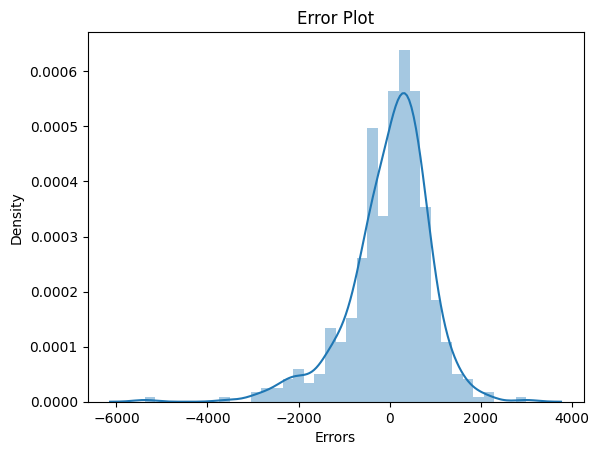

In [120]:
err_plot(y_train, y_train_pred)

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We can see that errors are normally distributed with mean - 0</span>

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Lets see how are the y-actual values and y predicted values</span>

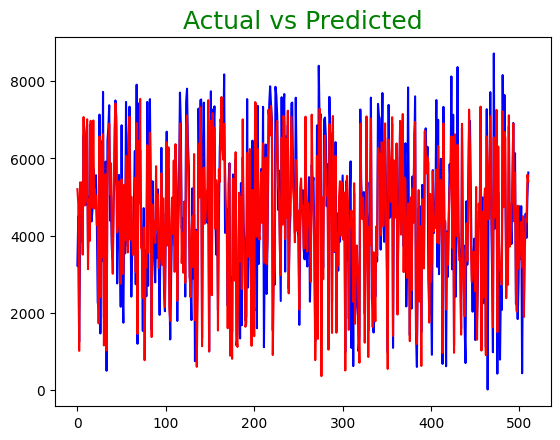

In [121]:
#Actual vs Predicted
data_points = [i for i in range(0,len(X_train),1)]
plt.plot(data_points,y_train, color="blue")
plt.plot(data_points,y_train_pred, color="red")
plt.title('Actual vs Predicted', fontsize = 18, color='green')
plt.show()

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Homoscedasticity</span>

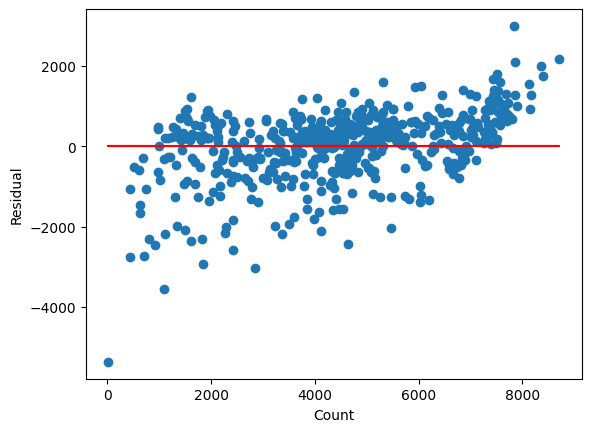

In [126]:
residual = y_train - y_train_pred
plt.scatter(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">We observe that there is no visible patter on residuals</span>

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Predict the values of test data using the model</span>

In [127]:
#Scale variables in X_test as we did for x_train
boombikes_numvars = ['temp', 'atemp', 'humidity', 'windspeed']

#We only transform test data, no fitting on test data
X_test[boombikes_numvars] = scaler.transform(X_test[boombikes_numvars])

In [128]:
#Columns from our final model
cols = ['year', 'temp', 'windspeed',
        'Sep', 'Moderate', 'Spring', 'Summer', 'Winter']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Calculate R-squared value for test data set</span>

In [129]:
r2_score(y_test,y_test_pred)

0.7561538225306417

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">R2 for train data - 0.79</span>
##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">R2 for test data - 0.76</span>
##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Both the values are almost close. So the model works well on unseen data set too.</span>

Text(0, 0.5, 'y_test_pred')

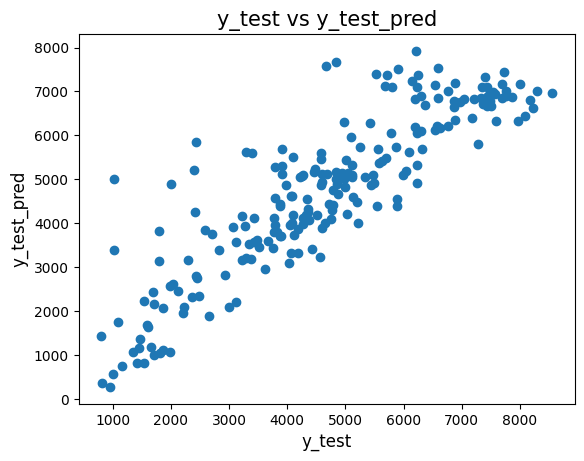

In [131]:
#Plot actual y-test values and y-test-predicted values
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 15)              
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_test_pred', fontsize = 12)

In [132]:
def plot_actual_pred(actual,pred,scale,dataname):
    data_pnts = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(data_pnts,actual, color="blue")
    plt.plot(data_pnts,pred, color="red")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              

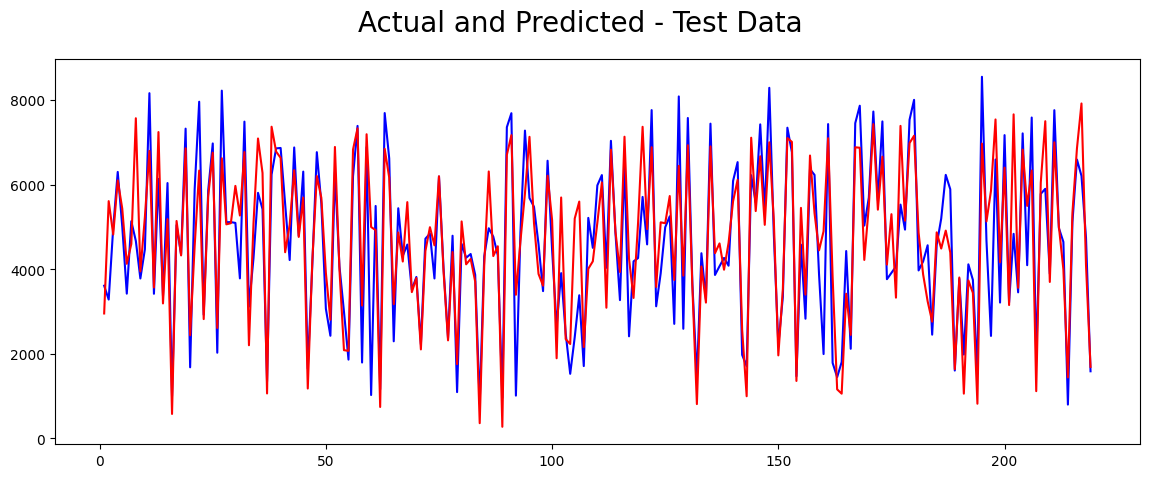

In [133]:
plot_actual_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

##### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">From both the plots above, we can see that the actual values and predicted values are pretty close</span>